# Lung and Colon cancer detection

# Importing libraries

In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense, BatchNormalization, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adamax
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Model

# Preprocessing

Loading data set

In [6]:
file_paths_lung = []
labels_lung = []

file_paths_colon = []
labels_colon = []

lung_file_path = 'input_files/lung_colon_image_set/lung_image_sets'
colon_file_path = 'input_files/lung_colon_image_set/colon_image_sets'

lung_types = os.listdir(lung_file_path)
colon_types = os.listdir(colon_file_path)

for lung_type in lung_types:
    folder_path = os.path.join(lung_file_path, lung_type)
    list_of_files = os.listdir(folder_path)
    for file in list_of_files:
        file_path = os.path.join(folder_path, file)
        
        file_paths_lung.append(file_path)
        labels_lung.append(lung_type)

for colon_type in colon_types:
    folder_path = os.path.join(colon_file_path, colon_type)
    list_of_files = os.listdir(folder_path)
    for file in list_of_files:
        file_path = os.path.join(folder_path, file)
        
        file_paths_colon.append(file_path)
        labels_colon.append(colon_type)
        

lung_data_frame = pd.concat([pd.Series(file_paths_lung, name="paths"), pd.Series(labels_lung, name="labels")], axis=1)
colon_data_frame = pd.concat([pd.Series(file_paths_colon, name="paths"), pd.Series(labels_colon, name="labels")], axis=1)

print(lung_data_frame)


                                                   paths    labels
0      input_files/lung_colon_image_set/lung_image_se...  lung_aca
1      input_files/lung_colon_image_set/lung_image_se...  lung_aca
2      input_files/lung_colon_image_set/lung_image_se...  lung_aca
3      input_files/lung_colon_image_set/lung_image_se...  lung_aca
4      input_files/lung_colon_image_set/lung_image_se...  lung_aca
...                                                  ...       ...
14995  input_files/lung_colon_image_set/lung_image_se...  lung_scc
14996  input_files/lung_colon_image_set/lung_image_se...  lung_scc
14997  input_files/lung_colon_image_set/lung_image_se...  lung_scc
14998  input_files/lung_colon_image_set/lung_image_se...  lung_scc
14999  input_files/lung_colon_image_set/lung_image_se...  lung_scc

[15000 rows x 2 columns]


 Is data set balanced?

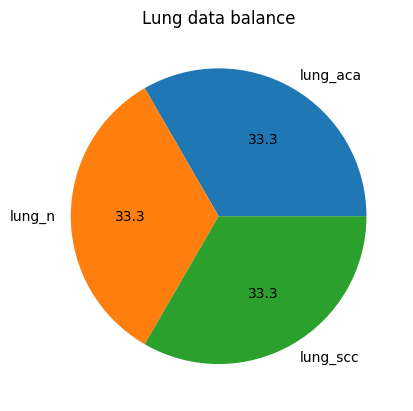

In [7]:
plt.pie(lung_data_frame.labels.value_counts(), labels = lung_data_frame.labels.value_counts().index, autopct='%1.1f')
plt.title("Lung data balance")
plt.show()

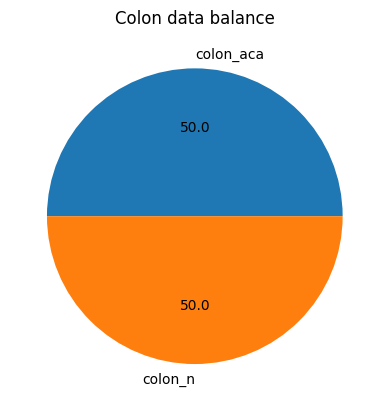

In [8]:
plt.pie(colon_data_frame.labels.value_counts(), labels = colon_data_frame.labels.value_counts().index, autopct='%1.1f')
plt.title("Colon data balance")
plt.show()

Splitting data in 3 groups: train, test and valid

In [9]:
train_df_lung, rest_lung = train_test_split(lung_data_frame, train_size=0.7, shuffle=True, random_state=123)
valid_df_lung, test_df_lung = train_test_split(rest_lung, train_size=0.5, shuffle=True, random_state=123)

In [10]:
train_df_colon, rest_colon = train_test_split(colon_data_frame, train_size=0.7, shuffle=True, random_state=123)
valid_df_colon, test_df_colon = train_test_split(rest_colon, train_size=0.5, shuffle=True, random_state=123)

Image data generator

In [34]:
batch_size = 32
img_size = (224, 224)

tr_gen_lung = ImageDataGenerator(rescale=1./255)
ts_gen_lung = ImageDataGenerator(rescale=1./255)
val_gen_lung = ImageDataGenerator(rescale=1./255)

train_gen_lung = tr_gen_lung.flow_from_dataframe(
    train_df_lung,
    x_col= 'paths',
    y_col='labels', 
    target_size=img_size, 
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size)

valid_gen_lung = val_gen_lung.flow_from_dataframe(
    valid_df_lung,
    x_col= 'paths',
    y_col='labels', 
    target_size=img_size, 
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size)

test_gen_lung = ts_gen_lung.flow_from_dataframe(
    test_df_lung,
    x_col= 'paths',
    y_col='labels', 
    target_size=img_size, 
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size)

Found 10500 validated image filenames belonging to 3 classes.
Found 2250 validated image filenames belonging to 3 classes.
Found 2250 validated image filenames belonging to 3 classes.


In [20]:
tr_gen_colon = ImageDataGenerator(rescale=1./255)
ts_gen_colon = ImageDataGenerator(rescale=1./255)
val_gen_colon = ImageDataGenerator(rescale=1./255)

train_gen_colon = tr_gen_colon.flow_from_dataframe(
    train_df_colon,
    x_col= 'paths',
    y_col='labels', 
    target_size=img_size, 
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size)

valid_gen_colon = val_gen_colon.flow_from_dataframe(
    valid_df_colon,
    x_col= 'paths',
    y_col='labels', 
    target_size=img_size, 
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size)

test_gen_colon = ts_gen_colon.flow_from_dataframe(
    test_df_colon,
    x_col= 'paths',
    y_col='labels', 
    target_size=img_size, 
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size)

Found 7000 validated image filenames belonging to 2 classes.
Found 1500 validated image filenames belonging to 2 classes.
Found 1500 validated image filenames belonging to 2 classes.


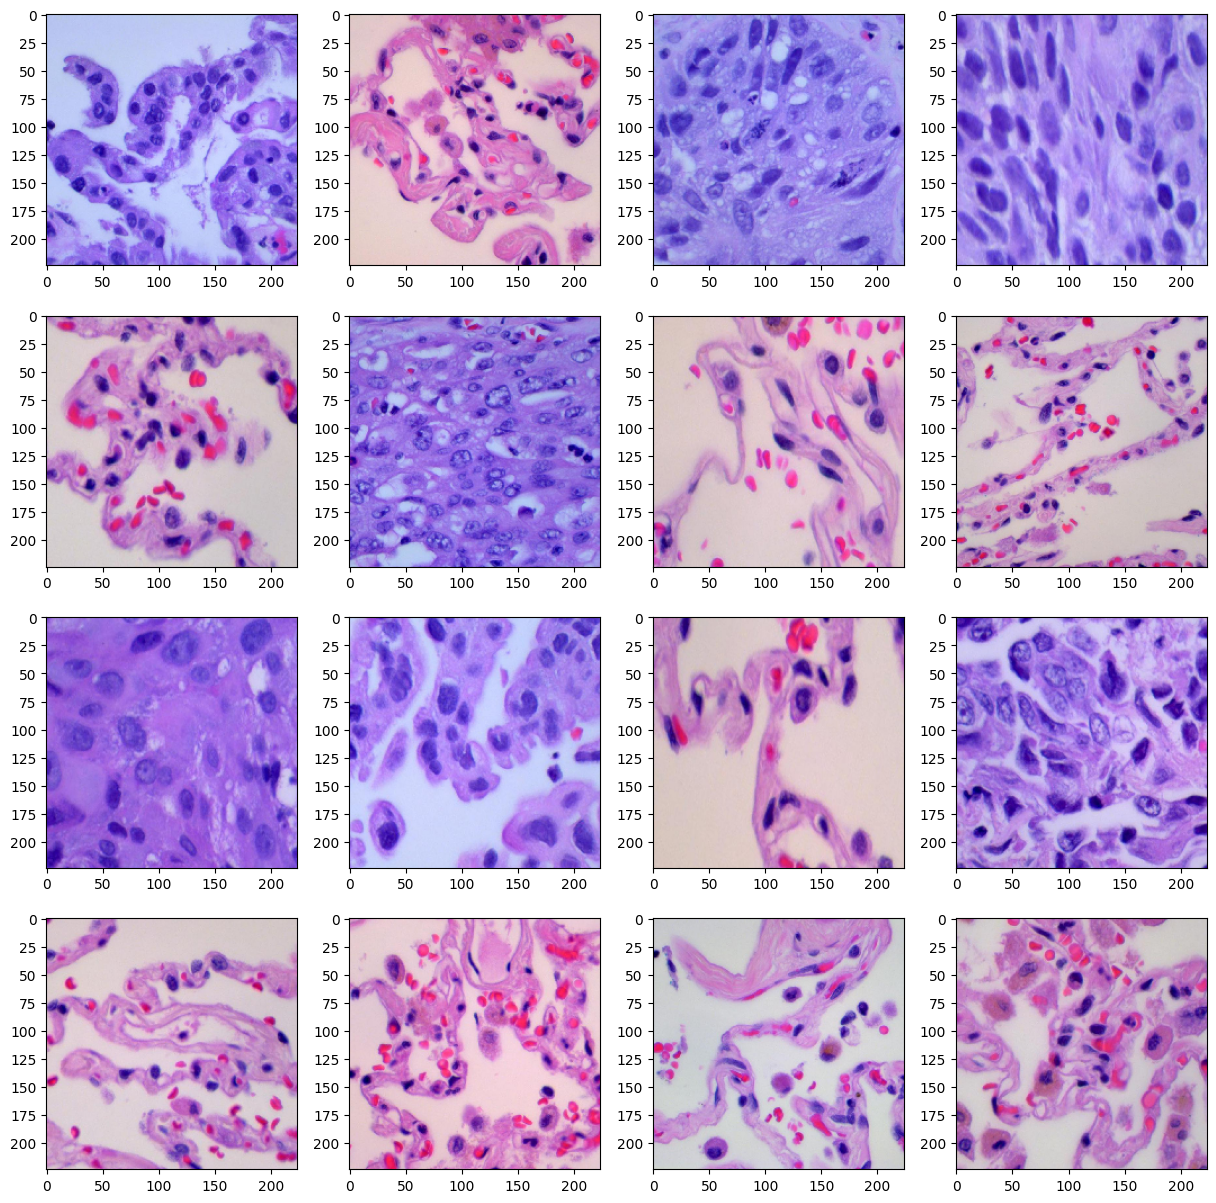

In [13]:
images, labels = next(train_gen_lung)

plt.figure(figsize= (15, 15))

for i in range(batch_size):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i])
    
plt.show()

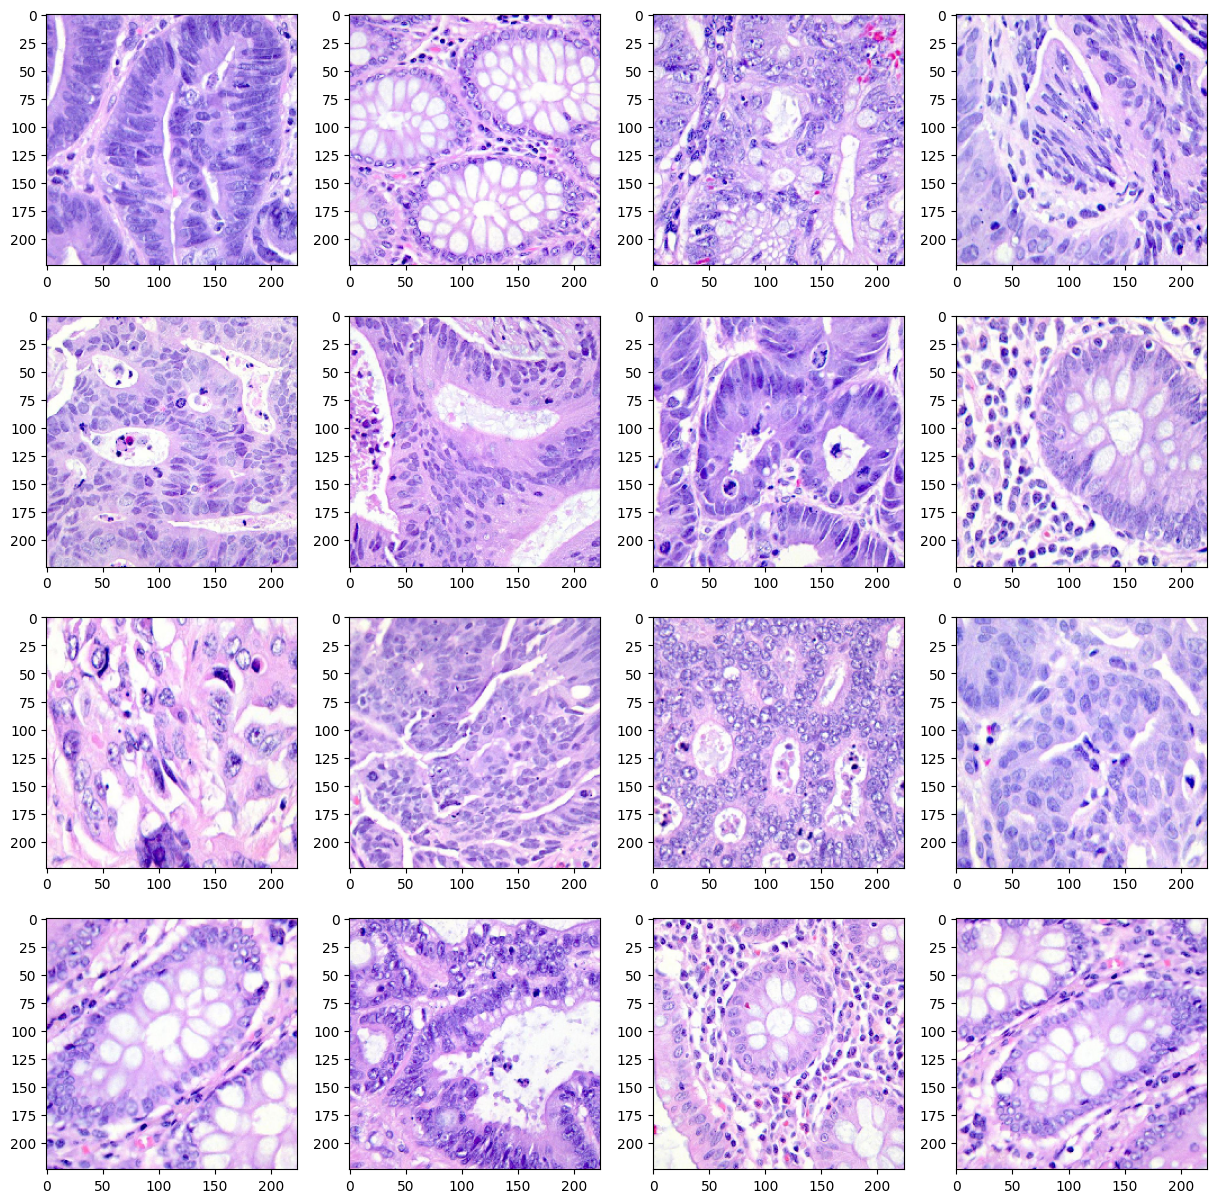

In [14]:
images, labels = next(train_gen_colon)

plt.figure(figsize= (15, 15))

for i in range(batch_size):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i])
    
plt.show()

# Models

In [15]:
model_lung = Sequential([
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(list(train_gen_lung.class_indices.keys())), activation='softmax')
])

model_lung.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model_lung.summary()

C:\Users\Vladimir\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 224, 224, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 7, 7, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,89

 Total params: 2,798,051 (10.67 MB)

 Trainable params: 2,796,035 (10.67 MB)

 Non-trainable params: 2,016 (7.88 KB)

In [20]:
epochs = 20
history_lung = model_lung.fit(train_gen_lung, epochs= epochs, verbose= 1, validation_data= valid_gen_lung, shuffle= False)

Epoch 1/20


C:\Users\Vladimir\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


657/657 ━━━━━━━━━━━━━━━━━━━━ 209s 313ms/step - accuracy: 0.7884 - loss: 0.6310 - val_accuracy: 0.9196 - val_loss: 0.2469
Epoch 2/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 168s 255ms/step - accuracy: 0.8877 - loss: 0.3009 - val_accuracy: 0.9262 - val_loss: 0.2062
Epoch 3/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 161s 245ms/step - accuracy: 0.9173 - loss: 0.2260 - val_accuracy: 0.9627 - val_loss: 0.1046
Epoch 4/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 160s 244ms/step - accuracy: 0.9435 - loss: 0.1679 - val_accuracy: 0.9031 - val_loss: 0.2079
Epoch 5/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 167s 254ms/step - accuracy: 0.9523 - loss: 0.1359 - val_accuracy: 0.9738 - val_loss: 0.0791
Epoch 6/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 161s 245ms/step - accuracy: 0.9681 - loss: 0.0959 - val_accuracy: 0.9511 - val_loss: 0.1313
Epoch 7/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 161s 246ms/step - accuracy: 0.9770 - loss: 0.0723 - val_accuracy: 0.9711 - val_loss: 0.0753
Epoch 8/20
657/657 ━━━━━━━━━━━━━━━━━━━━ 160s 244ms/step - accuracy: 0.9772 - loss: 0.06

In [22]:
model_lung.save("models/model_lung.keras")

In [29]:
model_lung_test = load_model("models/model_lung.keras")
model_lung_test.summary()

C:\Users\Vladimir\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 34 variables whereas the saved optimizer has 66 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 224, 224, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 7, 7, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,89

 Total params: 5,594,088 (21.34 MB)

 Trainable params: 2,796,035 (10.67 MB)

 Non-trainable params: 2,016 (7.88 KB)

 Optimizer params: 2,796,037 (10.67 MB)

In [16]:
def print_performance(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    epochs = range(1, len(train_loss) + 1)
    
    # Find the best epoch based on validation loss and accuracy
    best_epoch_loss = val_loss.index(min(val_loss)) + 1
    best_epoch_acc = val_acc.index(max(val_acc)) + 1
    
    # Plot training and validation loss
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.plot(best_epoch_loss, val_loss[best_epoch_loss-1], 'go', label='Best Epoch (Val Loss)')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.plot(best_epoch_acc, val_acc[best_epoch_acc-1], 'go', label='Best Epoch (Val Accuracy)')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()
    
print_performance(history_lung)

NameError: name 'history_lung' is not defined

In [17]:
def print_evaluation(model, train_gen, valid_gen, test_gen):
    train_score = model.evaluate(train_gen, verbose= 1)
    valid_score = model.evaluate(valid_gen, verbose= 1)
    test_score = model.evaluate(test_gen, verbose= 1)
    
    print("Train Loss: ", train_score[0])
    print("Train Accuracy: ", train_score[1])
    print('-' * 20)
    print("Validation Loss: ", valid_score[0])
    print("Validation Accuracy: ", valid_score[1])
    print('-' * 20)
    print("Test Loss: ", test_score[0])
    print("Test Accuracy: ", test_score[1])
    
print_evaluation(model_lung, train_gen_lung, valid_gen_lung, test_gen_lung)

  1/657 ━━━━━━━━━━━━━━━━━━━━ 8:57 819ms/step - accuracy: 0.2500 - loss: 1.1007

C:\Users\Vladimir\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


172/657 ━━━━━━━━━━━━━━━━━━━━ 36s 74ms/step - accuracy: 0.3277 - loss: 1.0985

KeyboardInterrupt: 

141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step


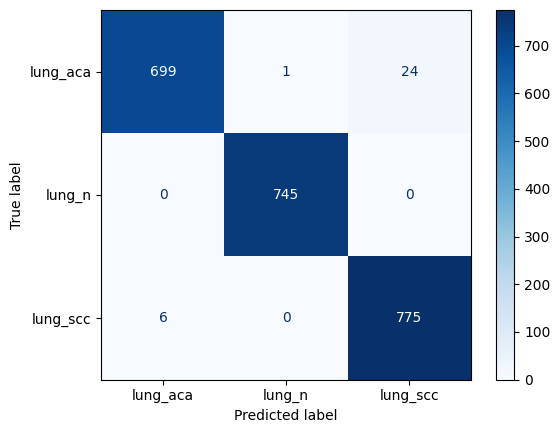

In [54]:
def print_confusion_matrix(model, test_gen):
    y_pred = np.argmax(model.predict(test_gen), axis=1)
    cm = confusion_matrix(test_gen.classes, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_gen.class_indices.keys()))
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
    

print_confusion_matrix(model_lung, test_gen_lung)


In [56]:
print(classification_report(test_gen_lung.classes, np.argmax(model_lung.predict(test_gen_lung), axis=1), target_names= list(test_gen_lung.class_indices.keys())))

141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step
              precision    recall  f1-score   support

    lung_aca       0.99      0.97      0.98       724
      lung_n       1.00      1.00      1.00       745
    lung_scc       0.97      0.99      0.98       781

    accuracy                           0.99      2250
   macro avg       0.99      0.99      0.99      2250
weighted avg       0.99      0.99      0.99      2250


In [23]:
# model_colon = Sequential([
#     Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'),
#     BatchNormalization(),
#     MaxPooling2D(),
#     Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D(),
#     Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D(),
#     Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D(),
#     Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D(),
#     Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D(),
#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     Dense(128, activation='relu'),
#     Dropout(0.3),
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     Dense(len(list(train_gen_colon.class_indices.keys())), activation='softmax')
# ])
# 
# model_colon.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])
# 
# model_colon.summary()

# Define the model
model_colon = Sequential()

# First convolutional layer
model_colon.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_colon.add(MaxPooling2D((2, 2)))
model_colon.add(BatchNormalization())

# Second convolutional layer
model_colon.add(Conv2D(64, (3, 3), activation='relu'))
model_colon.add(MaxPooling2D((2, 2)))
model_colon.add(BatchNormalization())

# Third convolutional layer
model_colon.add(Conv2D(128, (3, 3), activation='relu'))
model_colon.add(MaxPooling2D((2, 2)))
model_colon.add(BatchNormalization())

# Flatten the output
model_colon.add(Flatten())

# Fully connected layer
model_colon.add(Dense(128, activation='relu'))
model_colon.add(Dropout(0.5))

# Output layer
model_colon.add(Dense(2, activation='softmax'))

# Compile the model
model_colon.compile(optimizer=Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model_colon.summary()

C:\Users\Vladimir\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,114 (42.61 MB)

 Trainable params: 11,169,666 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [24]:
epochs = 20
history_colon = model_colon.fit(train_gen_colon, epochs= epochs, verbose= 1, validation_data= valid_gen_colon)

Epoch 1/20


C:\Users\Vladimir\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


438/438 ━━━━━━━━━━━━━━━━━━━━ 144s 324ms/step - accuracy: 0.8565 - loss: 2.2173 - val_accuracy: 0.4867 - val_loss: 60.7124
Epoch 2/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 140s 318ms/step - accuracy: 0.9419 - loss: 0.2346 - val_accuracy: 0.9607 - val_loss: 0.1310
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 138s 314ms/step - accuracy: 0.9618 - loss: 0.1236 - val_accuracy: 0.8933 - val_loss: 0.4925
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 137s 312ms/step - accuracy: 0.9740 - loss: 0.0922 - val_accuracy: 0.6427 - val_loss: 5.3209
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 139s 316ms/step - accuracy: 0.9795 - loss: 0.0888 - val_accuracy: 0.9760 - val_loss: 0.1293
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 137s 311ms/step - accuracy: 0.9817 - loss: 0.0901 - val_accuracy: 0.9767 - val_loss: 0.0792
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 137s 312ms/step - accuracy: 0.9851 - loss: 0.0435 - val_accuracy: 0.9620 - val_loss: 0.1106
Epoch 8/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 136s 310ms/step - accuracy: 0.9902 - loss: 0.0

In [45]:
model_colon.save("models/model_colon.keras")

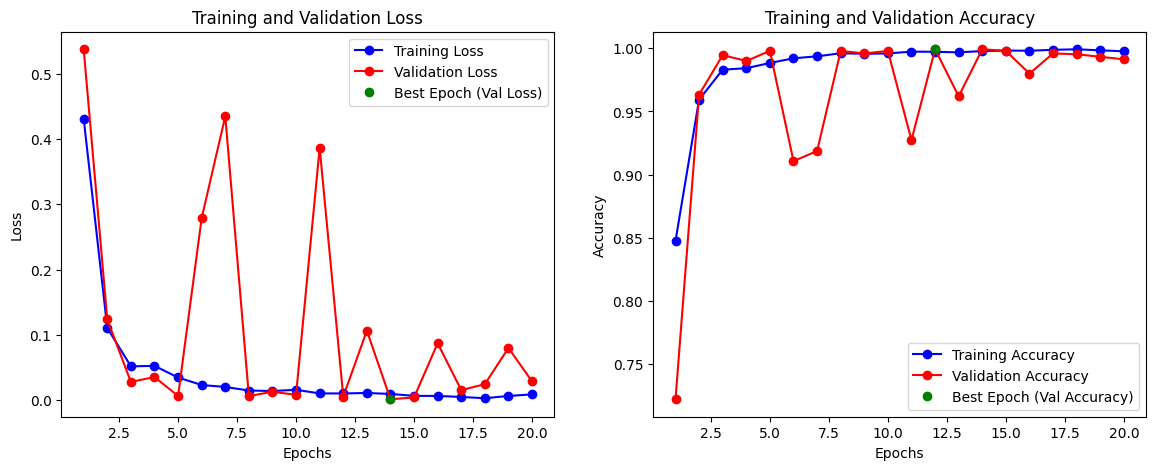

In [47]:
print_performance(history_colon)

In [53]:
print_evaluation(model_colon, train_gen_colon, valid_gen_colon, test_gen_colon)

438/438 ━━━━━━━━━━━━━━━━━━━━ 33s 74ms/step - accuracy: 0.9966 - loss: 0.0096
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9922 - loss: 0.0353
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9924 - loss: 0.0280
Train Loss:  0.013354904018342495
Train Accuracy:  0.9950000047683716
--------------------
Validation Loss:  0.028461506590247154
Validation Accuracy:  0.9913333058357239
--------------------
Test Loss:  0.04647204652428627
Test Accuracy:  0.9879999756813049


94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step


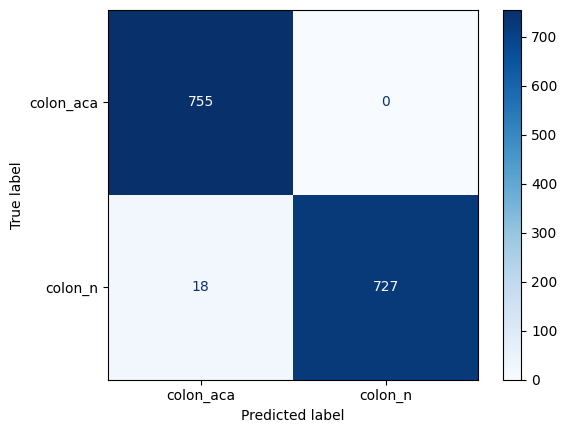

In [55]:
print_confusion_matrix(model_colon, test_gen_colon)

In [57]:
print(classification_report(test_gen_colon.classes, np.argmax(model_colon.predict(test_gen_colon), axis=1), target_names= list(test_gen_colon.class_indices.keys())))

94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step
              precision    recall  f1-score   support

   colon_aca       0.98      1.00      0.99       755
     colon_n       1.00      0.98      0.99       745

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500


Efficient Net

In [28]:
base_model_lung = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='none')

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Fine-tuning

In [35]:
x = base_model_lung.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(len(list(train_gen_lung.class_indices.keys())), activation='softmax')(x)

In [30]:
EfficientNetB3_model_lung = Model(inputs = base_model_lung.input, outputs = predictions)

In [32]:
EfficientNetB3_model_lung.compile(optimizer=Adamax(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
EfficientNetB3_model_lung.summary()

Model: "functional_53"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_5[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │      1,080 │ stem_conv_pad[0]… │
│                     │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        160 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        360 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        160 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 40)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 40)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 40)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 10)  │        410 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 40)  │        440 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 40)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        960 │ block1a_se_excit

 Total params: 10,990,642 (41.93 MB)

 Trainable params: 10,900,267 (41.58 MB)

 Non-trainable params: 90,375 (353.03 KB)

In [37]:
EfficientNetB3_model_lung_history = EfficientNetB3_model_lung.fit(train_gen_lung, epochs = 20, verbose = 1, validation_data = valid_gen_lung)

Epoch 1/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5741 - loss: 1.0146

C:\Users\Vladimir\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


329/329 ━━━━━━━━━━━━━━━━━━━━ 1586s 5s/step - accuracy: 0.5744 - loss: 1.0138 - val_accuracy: 0.4667 - val_loss: 1.0043
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1461s 4s/step - accuracy: 0.8482 - loss: 0.3765 - val_accuracy: 0.3444 - val_loss: 1.9259
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1455s 4s/step - accuracy: 0.9077 - loss: 0.2517 - val_accuracy: 0.9507 - val_loss: 0.1282
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1528s 5s/step - accuracy: 0.9391 - loss: 0.1751 - val_accuracy: 0.9818 - val_loss: 0.0565
Epoch 5/20
183/329 ━━━━━━━━━━━━━━━━━━━━ 11:15 5s/step - accuracy: 0.9493 - loss: 0.1514

KeyboardInterrupt: 

In [ ]:
print_performance(EfficientNetB3_model_lung_history)